In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Dropout, Convolution2D, MaxPooling2D
from keras.datasets import fashion_mnist
from matplotlib import pyplot
from keras.utils import np_utils
import numpy as np

In [0]:
# load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

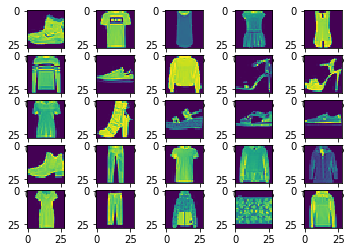

In [67]:
for i in range(25):
  pyplot.subplot(10/2, 10/2, i+1)
  pyplot.imshow(x_train[i])

In [68]:
num_class = len(np.unique(y_train))
print(num_class)

10


In [0]:
y_train = np_utils.to_categorical(y_train, num_classes=num_class)
y_test = np_utils.to_categorical(y_test, num_classes=num_class)

In [0]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

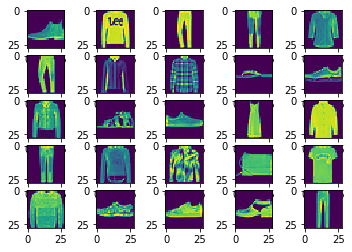

In [71]:
for i in range(25):
  pyplot.subplot(10/2, 10/2, i+1)
  pyplot.imshow(x_test[i])

In [73]:
input_shape = x_test.shape
print(input_shape)

(10000, 28, 28)


In [0]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [75]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
def model1():
  model = Sequential()
  model.add(Convolution2D(filters=32, kernel_size = 3, padding='same', input_shape = (28, 28, 1), activation = 'elu'))
  model.add(Droupout(0.2))
  model.add(MaxPooling2D(pool_size=2))
  model.add(BatchNormalization())
  model.add(Convolution2D(filters=64, kernel_size = 3, padding='same', activation = 'elu'))
  model.add(Droupout(0.2))
  model.add(MaxPooling2D(pool_size=2))
  model.add(BatchNormalization())
  model.add(Convolution2D(filters=128, kernel_size = 3, padding='same', activation = 'elu'))
  model.add(Droupout(0.2))
  model.add(MaxPooling2D(pool_size=2))
  model.add(BatchNormalization())
  model.add(Convolution2D(filters=256, kernel_size = 3, padding='same', activation = 'elu'))
  model.add(Droupout(0.2))
  model.add(MaxPooling2D(pool_size=2))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(10, activation = 'softmax'))
  return model

In [0]:
model = model1()

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [98]:
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=32, epochs=20, shuffle=True, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 13s 263us/step - loss: 0.0241 - acc: 0.9913 - val_loss: 0.4277 - val_acc: 0.9101
Epoch 2/20
48000/48000 [==============================] - 13s 261us/step - loss: 0.0247 - acc: 0.9910 - val_loss: 0.3935 - val_acc: 0.9190
Epoch 3/20
48000/48000 [==============================] - 12s 257us/step - loss: 0.0226 - acc: 0.9924 - val_loss: 0.4208 - val_acc: 0.9187
Epoch 4/20
48000/48000 [==============================] - 12s 255us/step - loss: 0.0220 - acc: 0.9923 - val_loss: 0.4362 - val_acc: 0.9162
Epoch 5/20
48000/48000 [==============================] - 12s 256us/step - loss: 0.0221 - acc: 0.9922 - val_loss: 0.4580 - val_acc: 0.9142
Epoch 6/20
48000/48000 [==============================] - 12s 259us/step - loss: 0.0209 - acc: 0.9927 - val_loss: 0.4399 - val_acc: 0.9154
Epoch 7/20
48000/48000 [==============================] - 13s 267us/step - loss: 0.0177 - acc: 0.9939 - val_loss: 0.

In [101]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


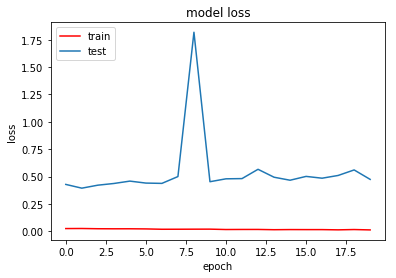

In [109]:
pyplot.plot(history.history['loss'], color = 'red')
pyplot.plot(history.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()

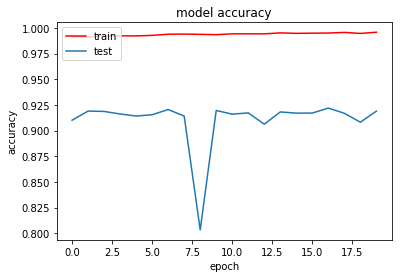

In [110]:
pyplot.plot(history.history['acc'], color = 'red')
pyplot.plot(history.history['val_acc'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()